# 作業目標:

    使用CIFAR100, 數據集變大的影響
    
    
# 作業重點:¶

   了解 CIFAR100 跟 CIFAR10 數據及差異


In [1]:
import numpy
from keras.datasets import cifar100
import numpy as np
np.random.seed(100)

Using TensorFlow backend.


# 資料準備

In [3]:
(x_train, y_train), (x_test, y_test) = cifar100.load_data()

169009152/169001437 [==============================] - 144s 1us/step


In [7]:
x_train.shape

(50000, 32, 32, 3)

In [8]:
y_train.shape

(50000, 1)

In [9]:
x_test.shape

(10000, 32, 32, 3)

In [10]:
y_test.shape

(10000, 1)

In [11]:
import matplotlib.pyplot as plt

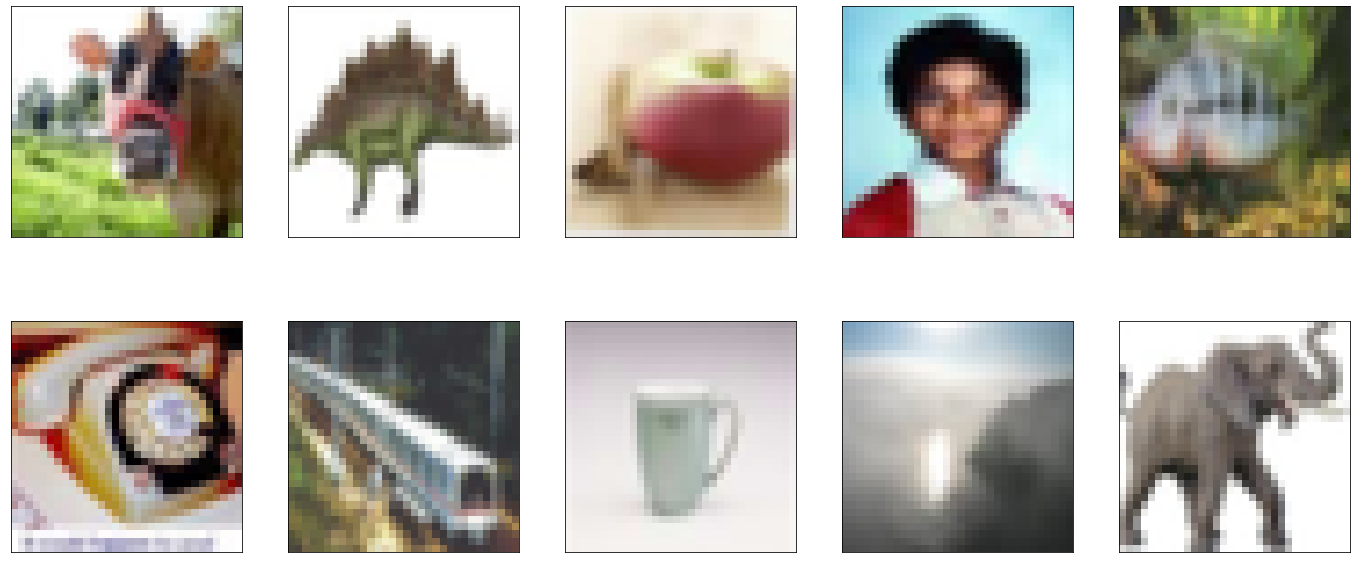

In [52]:
for i in range(10):
    ax = plt.subplot(5, 5, i+1) # fig, ax = plt.subplots
    fig = plt.gcf()
    fig.set_size_inches(24, 28)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(x_train[i], cmap='binary')

#針對物件圖像數據集的類別編列成字典

label_dict={0:"cow",1:"dragon",2:"apple",3:"people",4:"fish",
            5:"telephone",6:"train",7:"cup",8:"scene",9:"elephant"}

In [62]:
def plot_images_labels_prediction(images, labels, prediction, idx, num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num > 25:
        num = 25
    for i in range(0, num):
        ax = plt.subplot(5, 5, 1+i)
        ax.imshow(images[idx], cmap='binary')
        title = str(i)+','+label_dict[labels[i][0]]
        if len(prediction) > 0:
            title += '=>'+label_dict[prediction[i]]
        ax.set_title(title, fontsize=10)
        ax.set_xticks([])
        ax.set_yticks([])
        idx += 1
    plt.show()

# Image normalize 

In [64]:
x_train[0][0][0]

array([255, 255, 255], dtype=uint8)

In [67]:
x_train_norm = x_train.astype('float32')/255.0

In [68]:
y_train_norm = y_train.astype('float32')/255.0

# 轉換label 為OneHot Encoding

In [71]:
y_train[:5]

array([[19],
       [29],
       [ 0],
       [11],
       [ 1]])

In [72]:
from keras.utils import np_utils
y_train_OneHot = np_utils.to_categorical(y_train)
y_test_OneHot = np_utils.to_categorical(y_test)

In [78]:
y_train_OneHot

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [76]:
len(y_train_OneHot[0])

100